<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Actividad_1_4_2/1_4_2_Estadistica_de_Tendencia_Central_IPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción 


Las actividades que desarrollaremos en este laboratorio son las siguientes: 

- Cargar un archivo con datos en tu entorno de trabajo 
- Generar medidas de tendencia central y dispersión
- Crear gráficos con matplotlib. 

¡Empezamos! 
## Importar las librerías 
Antes de empezar vamos a importar las siguientes librerías: 

- Pandas 
- Numpy 
- Matplotlib
- Seaborn

In [1]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Cargar el archivo de datos



Cargaremos un archivo local llamado DATA.TSV.
Este archivo contiene una colección de observaciones sobre las erupciones del géiser Old Faithful en el parque nacional Yellowstone de los Estados Unidos.

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="\t")
df.head(5)

Saving 1_4_3_data (1).tsv to 1_4_3_data (1).tsv


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


¿Cuántas filas en total tiene este dataset?

* Este dataset contiene 272 filas

## Gráficos
Podemos representar fácilmente el histograma de la variable ERUPTIONS utilizando el método HIST de PANDAS: 


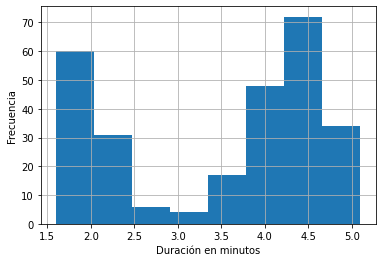

In [5]:
#Histograma
df['eruptions'].hist(bins=8)
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()                   

Se pueden comparar las variables ERUPTIONS y WAITING en la misma observación como coordenadas (x,y) y luego graficarlas en el eje cartesiano. Esto nos genera un DIAGRAMA DE DISPERSION.

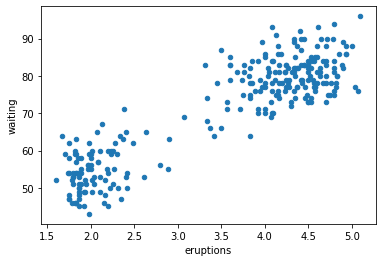

In [7]:
#Diagrama Dispersión
disp=df.plot(kind='scatter',x='eruptions', y='waiting')

¿Qué tipo de RELACION existen entre ambos datos del Dataset?
* Los datos se acumulan en lo valores bajos de los ejes X e Y y en los altos, no así en los intermedios
* Las variables parecen ser proporcionalmente directas

## Medidas de Tendencia Central
Calculemos algunas de las medidas de tendencia central.

In [8]:
#Media de variable eruptions
df['eruptions'].mean()

3.4877830882352936

In [9]:
#Mediana
df['eruptions'].median()

4.0

In [17]:
#Moda
df['eruptions'].mode()

0    1.867
1    4.500
dtype: float64

In [18]:
df[df['eruptions']==1.867].count()

eruptions    8
waiting      8
dtype: int64

In [19]:
df[df['eruptions']==4.500].count()

eruptions    8
waiting      8
dtype: int64

¿Qué significan estos DOS valores?
* Ambos valores son el retorno de .mode(), es decir, ambos son modas en los datos con la misma cantidad de entradas cada uno.

## Medidas de Dispersión
Aquí veremos por medio de un número, si las diferentes puntuaciones de una variable están muy alejadas de la media.Recordar que cuanto mayor sea ese valor, mayor será la variabilidad, y cunato menor sea, más homogénea será a la media.

In [20]:
#Varianza
df['eruptions'].var()

1.3027283328494672

¿Qué indica este valor?
* Es el valor absoluto de la diferencia entre el promedio y el valor analizado. Tiene un valor ligeramente por sobre 1.3 y considerando que la muestra tiene un rango entre 1.5 y 5.0 aproximadamente, la varianza indica una distribución no uniforme del set de datos.

In [21]:
#Desviación estándar
df['eruptions'].std()

1.1413712511052077

In [22]:
#Cuartiles
df['eruptions'].quantile([.25, .5, .75])

0.25    2.16275
0.50    4.00000
0.75    4.45425
Name: eruptions, dtype: float64

Un gráfico relacionado a los cuartiles y describe varias características importantes al mismo tiempo, tales como la dispersión y simetría es el diagrama de caja. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente.

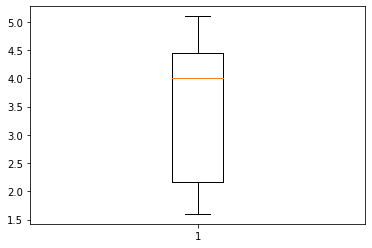

In [23]:
#Diagrama de Cajas
plt.boxplot(list(df['eruptions']))
plt.show()


In [24]:
#Covarianza
df.cov()

,eruptions,waiting
eruptions,1.302728,13.977808
waiting,13.977808,184.823312


¿Qué indican estos valores? 
* Corresponde a la matriz de covarianza. En la diagonal tiene los valores de las varianzas de cada variable por separado: 1.302728 para **eruptions** y 184.823312 para **waiting**. Los elementos restantes corresponden al valor de la covarianza, que indica como varía un eje cuando varía el otro.

* Como es un valor positivo, los ejes varían en la misma dirección.

In [25]:
#Coeficiente de correlación
df.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


¿Y estos valores?, ¿Cómo se interpretan?
* Es una matriz de correlación, análoga al caso anterior. Este valor varía entre -1 y 1 por lo que al ser 0.900811, muy cercano a 1, deja en claro que existe una regresión lineal que se ajusta bien al dataset, en otras palabras, son directamente proporcionales.

#Resumen

¿Podríamos resumir todo con un sólo comando?, bueno, todo no, pero si algunas medidas más significativas. Veamos.

In [26]:
#Resumen estadístico
df['eruptions'].describe()

count    272.000000
mean       3.487783
std        1.141371
min        1.600000
25%        2.162750
50%        4.000000
75%        4.454250
max        5.100000
Name: eruptions, dtype: float64

También podemos generar algunos gráficos resumidos

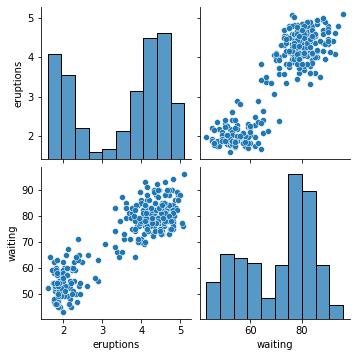

In [27]:
par=sns.pairplot(df)

Describe que indican estos gráficos...
* Usando la libreria Seaborn se pueden gráficar en un mismo sistema de ejes 2 variables en scatter. Los que están en vertical comparten el eje X, los que están en horizontal comparten el eje Y.
* Según la [documentación](https://seaborn.pydata.org/generated/seaborn.pairplot.html) los gráficos en la diagonal "muestran la distribución marginal de la data en cada columna". En otras palabras, muestran la probabilidad de que el calor de cada columna esté en el set de datos. Viendo los plots, queda clara la relación en el descenso de entradas en valores cercanos a 3 y la menor probabilidad de los mismos en ese rango.
* Al investigar sobre la recopilación de este dataset, se encontró que **eruptions** es la duración en minutos de una erupción y **waiting** es la duración en minutos hasta la siguiente erupción.
* plot[0,1] corresponde a la duración de las erupciones según cuanto tiempo se tardó hasta la siguiente erupción.
* plot[1,0] corresponde a cuanta demora hay hasta la próxima erupción según la duración de cada erupción.